In [42]:
# Getting necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,normalize
from scipy.cluster.hierarchy import dendrogram, linkage , fcluster
from sklearn.metrics import silhouette_samples,silhouette_score

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Creating DataFrame
airlines1 = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airlines2 = airlines1.drop("ID#",axis=1)

In [6]:
airlines2 = airlines2.rename(columns={'Award?':'Award'})

In [7]:
airlines2.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [8]:
for i in airlines2.columns:
    zeros = sum(airlines2[i]==0)
    print(i,' ' ,zeros)

Balance   1
Qual_miles   3773
cc1_miles   0
cc2_miles   0
cc3_miles   0
Bonus_miles   475
Bonus_trans   475
Flight_miles_12mo   2723
Flight_trans_12   2723
Days_since_enroll   0
Award   2518


In [9]:
airlines2.cc1_miles.unique()

array([1, 4, 3, 2, 5], dtype=int64)

In [10]:
airlines2.cc2_miles.unique()

array([1, 2, 3], dtype=int64)

In [11]:
airlines2.cc3_miles.unique()

array([1, 3, 2, 4, 5], dtype=int64)

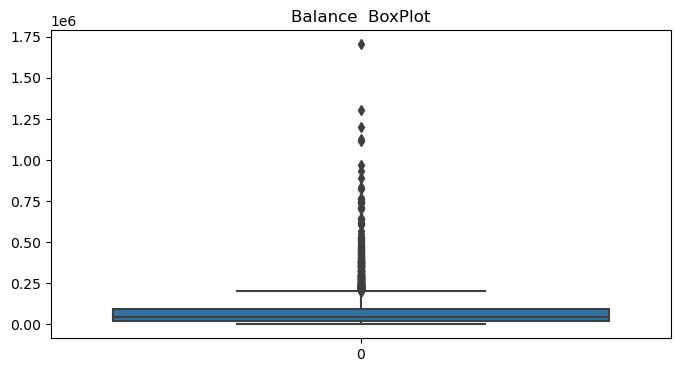

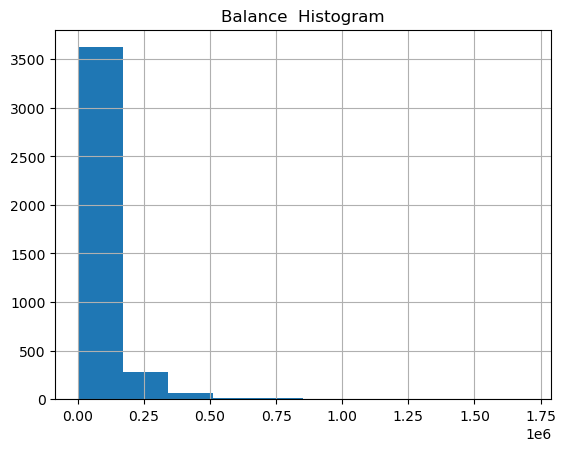

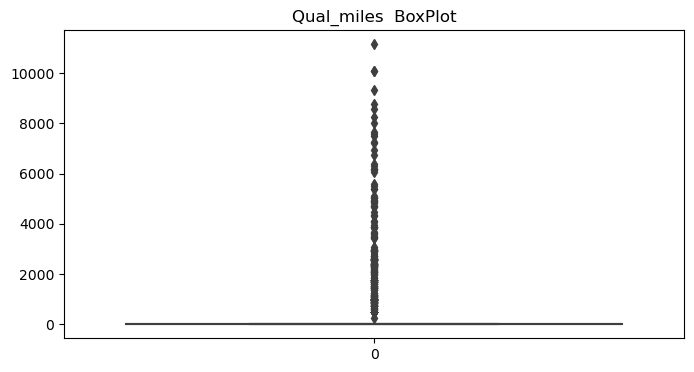

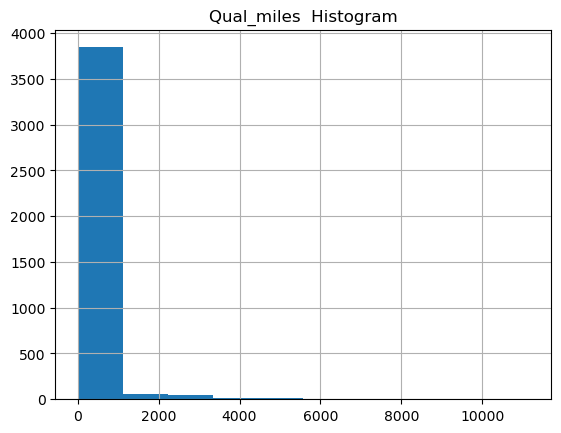

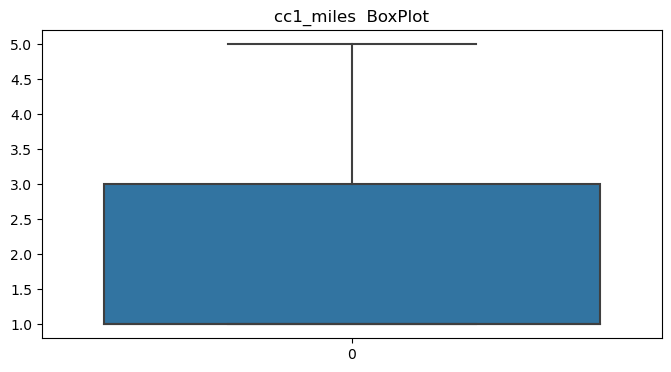

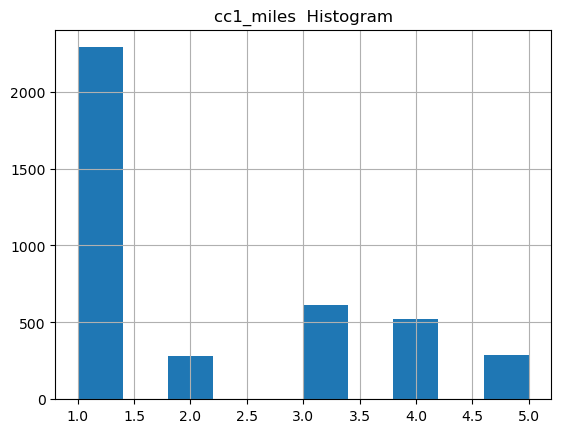

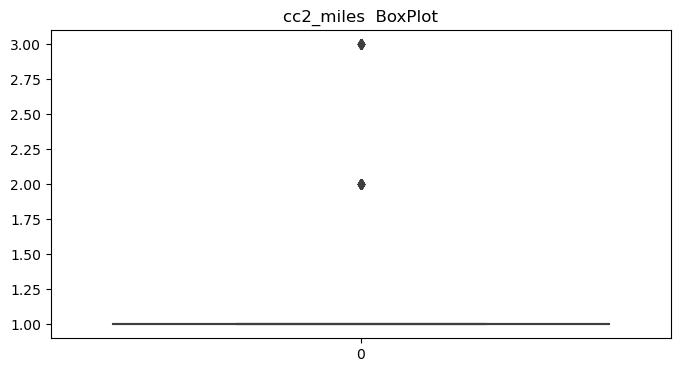

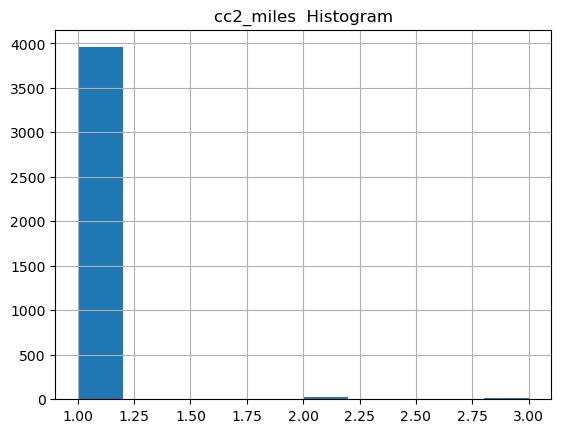

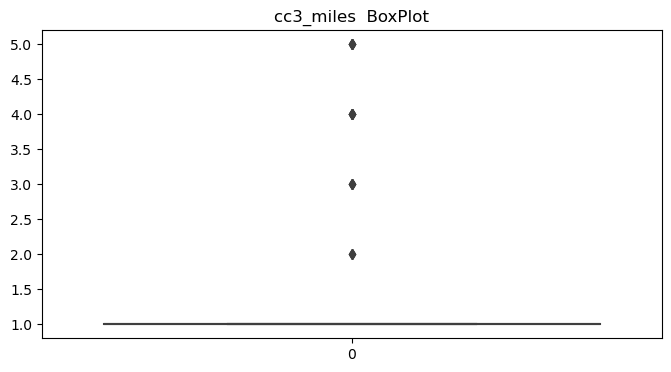

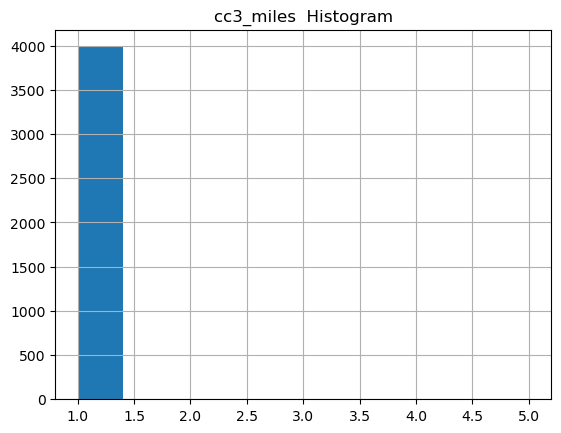

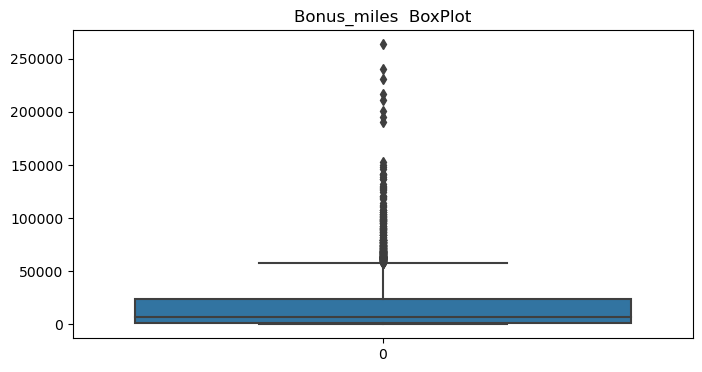

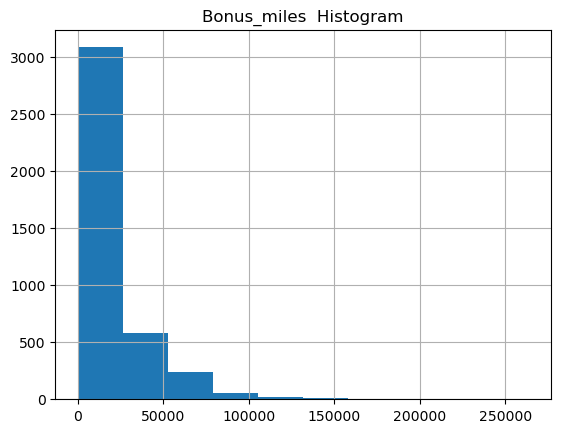

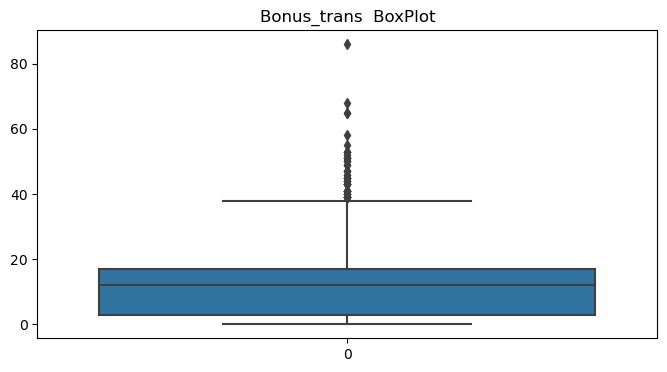

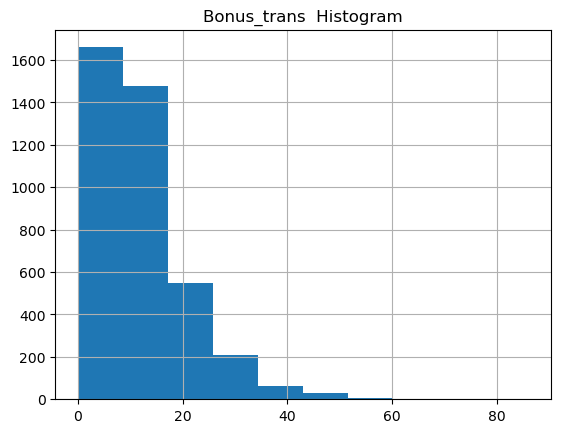

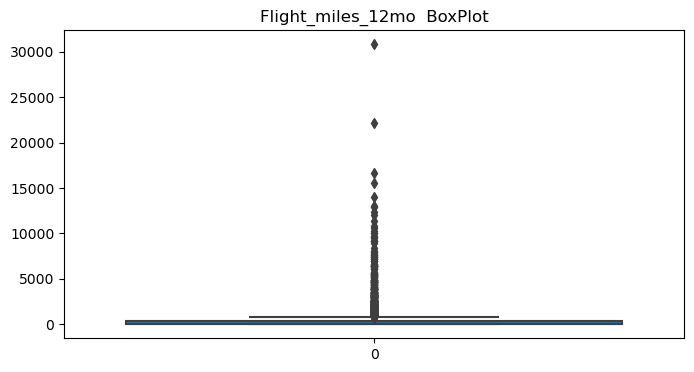

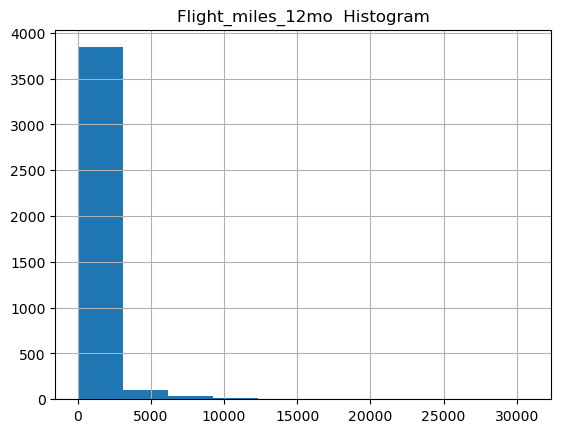

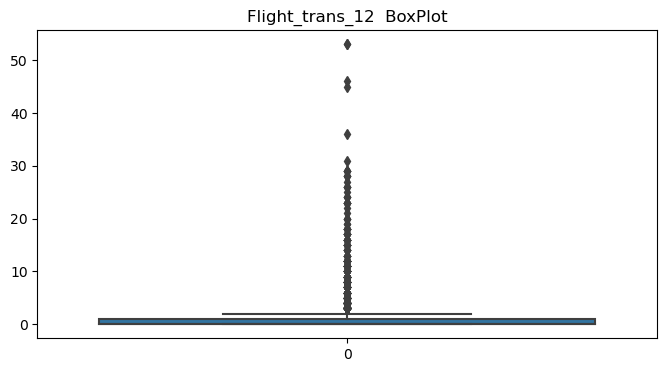

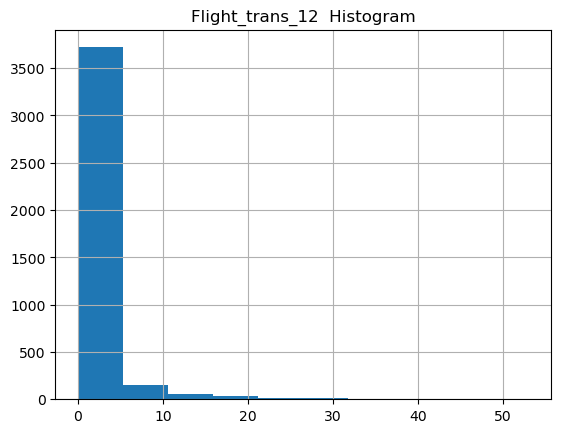

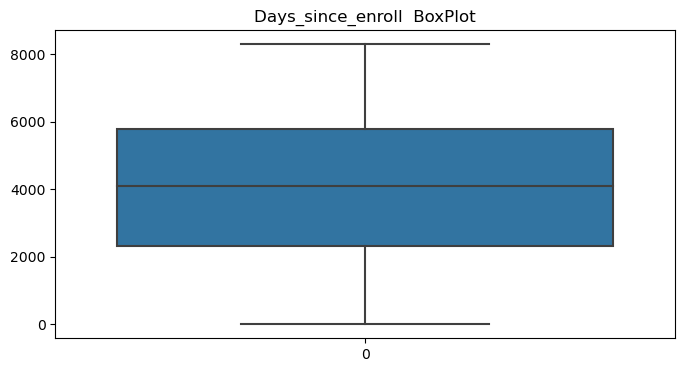

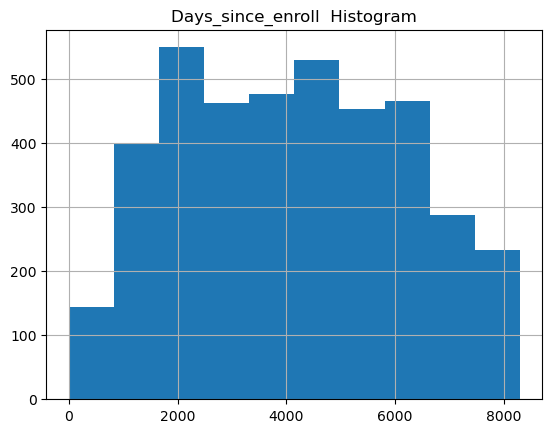

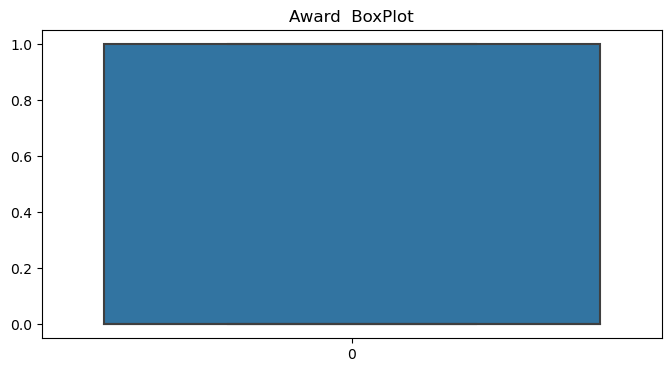

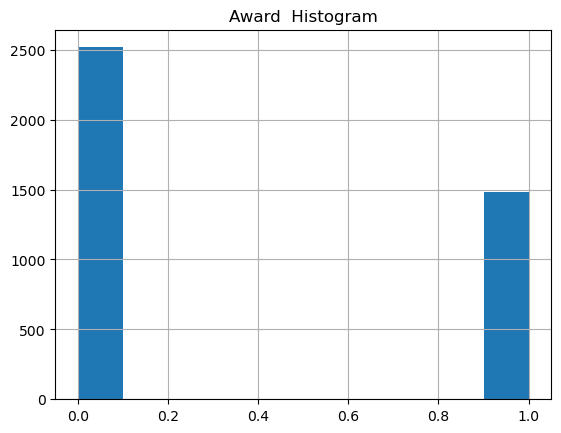

In [12]:
#Univariate Analysis:
for i in airlines2.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(data= airlines2[i])
    plt.title(i + '  BoxPlot')
    plt.show()
    airlines2[i].hist(bins = 10)
    plt.title(i + '  Histogram')
    plt.show()

In [13]:
#Standardize the data using Standard Scaler:
scaler = StandardScaler()
airlines3 = scaler.fit_transform(airlines2)
airlines3 = pd.DataFrame(airlines3,columns=airlines2.columns)
airlines3.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
5,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,-0.766919
6,0.112270,-0.186299,0.683121,-0.098242,-0.062767,0.428076,1.395256,-0.328603,-0.362168,1.392549,-0.766919
7,-0.523459,-0.186299,-0.769578,-0.098242,-0.062767,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,1.303918
8,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1.303918
9,0.310220,-0.186299,0.683121,-0.098242,-0.062767,0.467168,1.707671,0.492805,0.428826,1.362038,1.303918


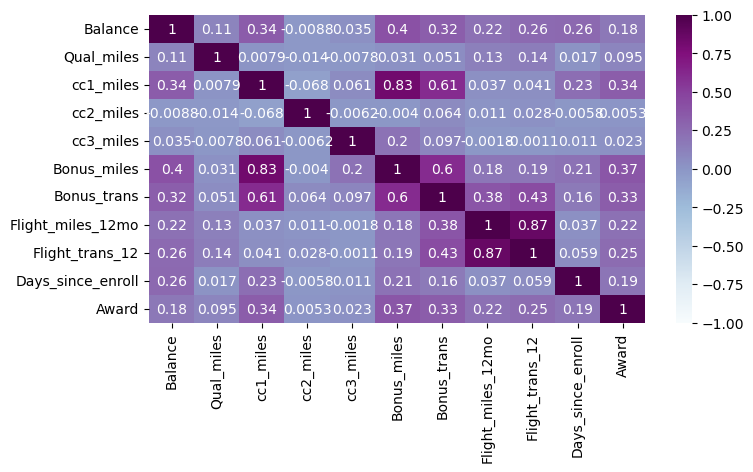

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(airlines3.corr(),vmax = 1,vmin=-1,annot=True,cmap='BuPu')
plt.show()

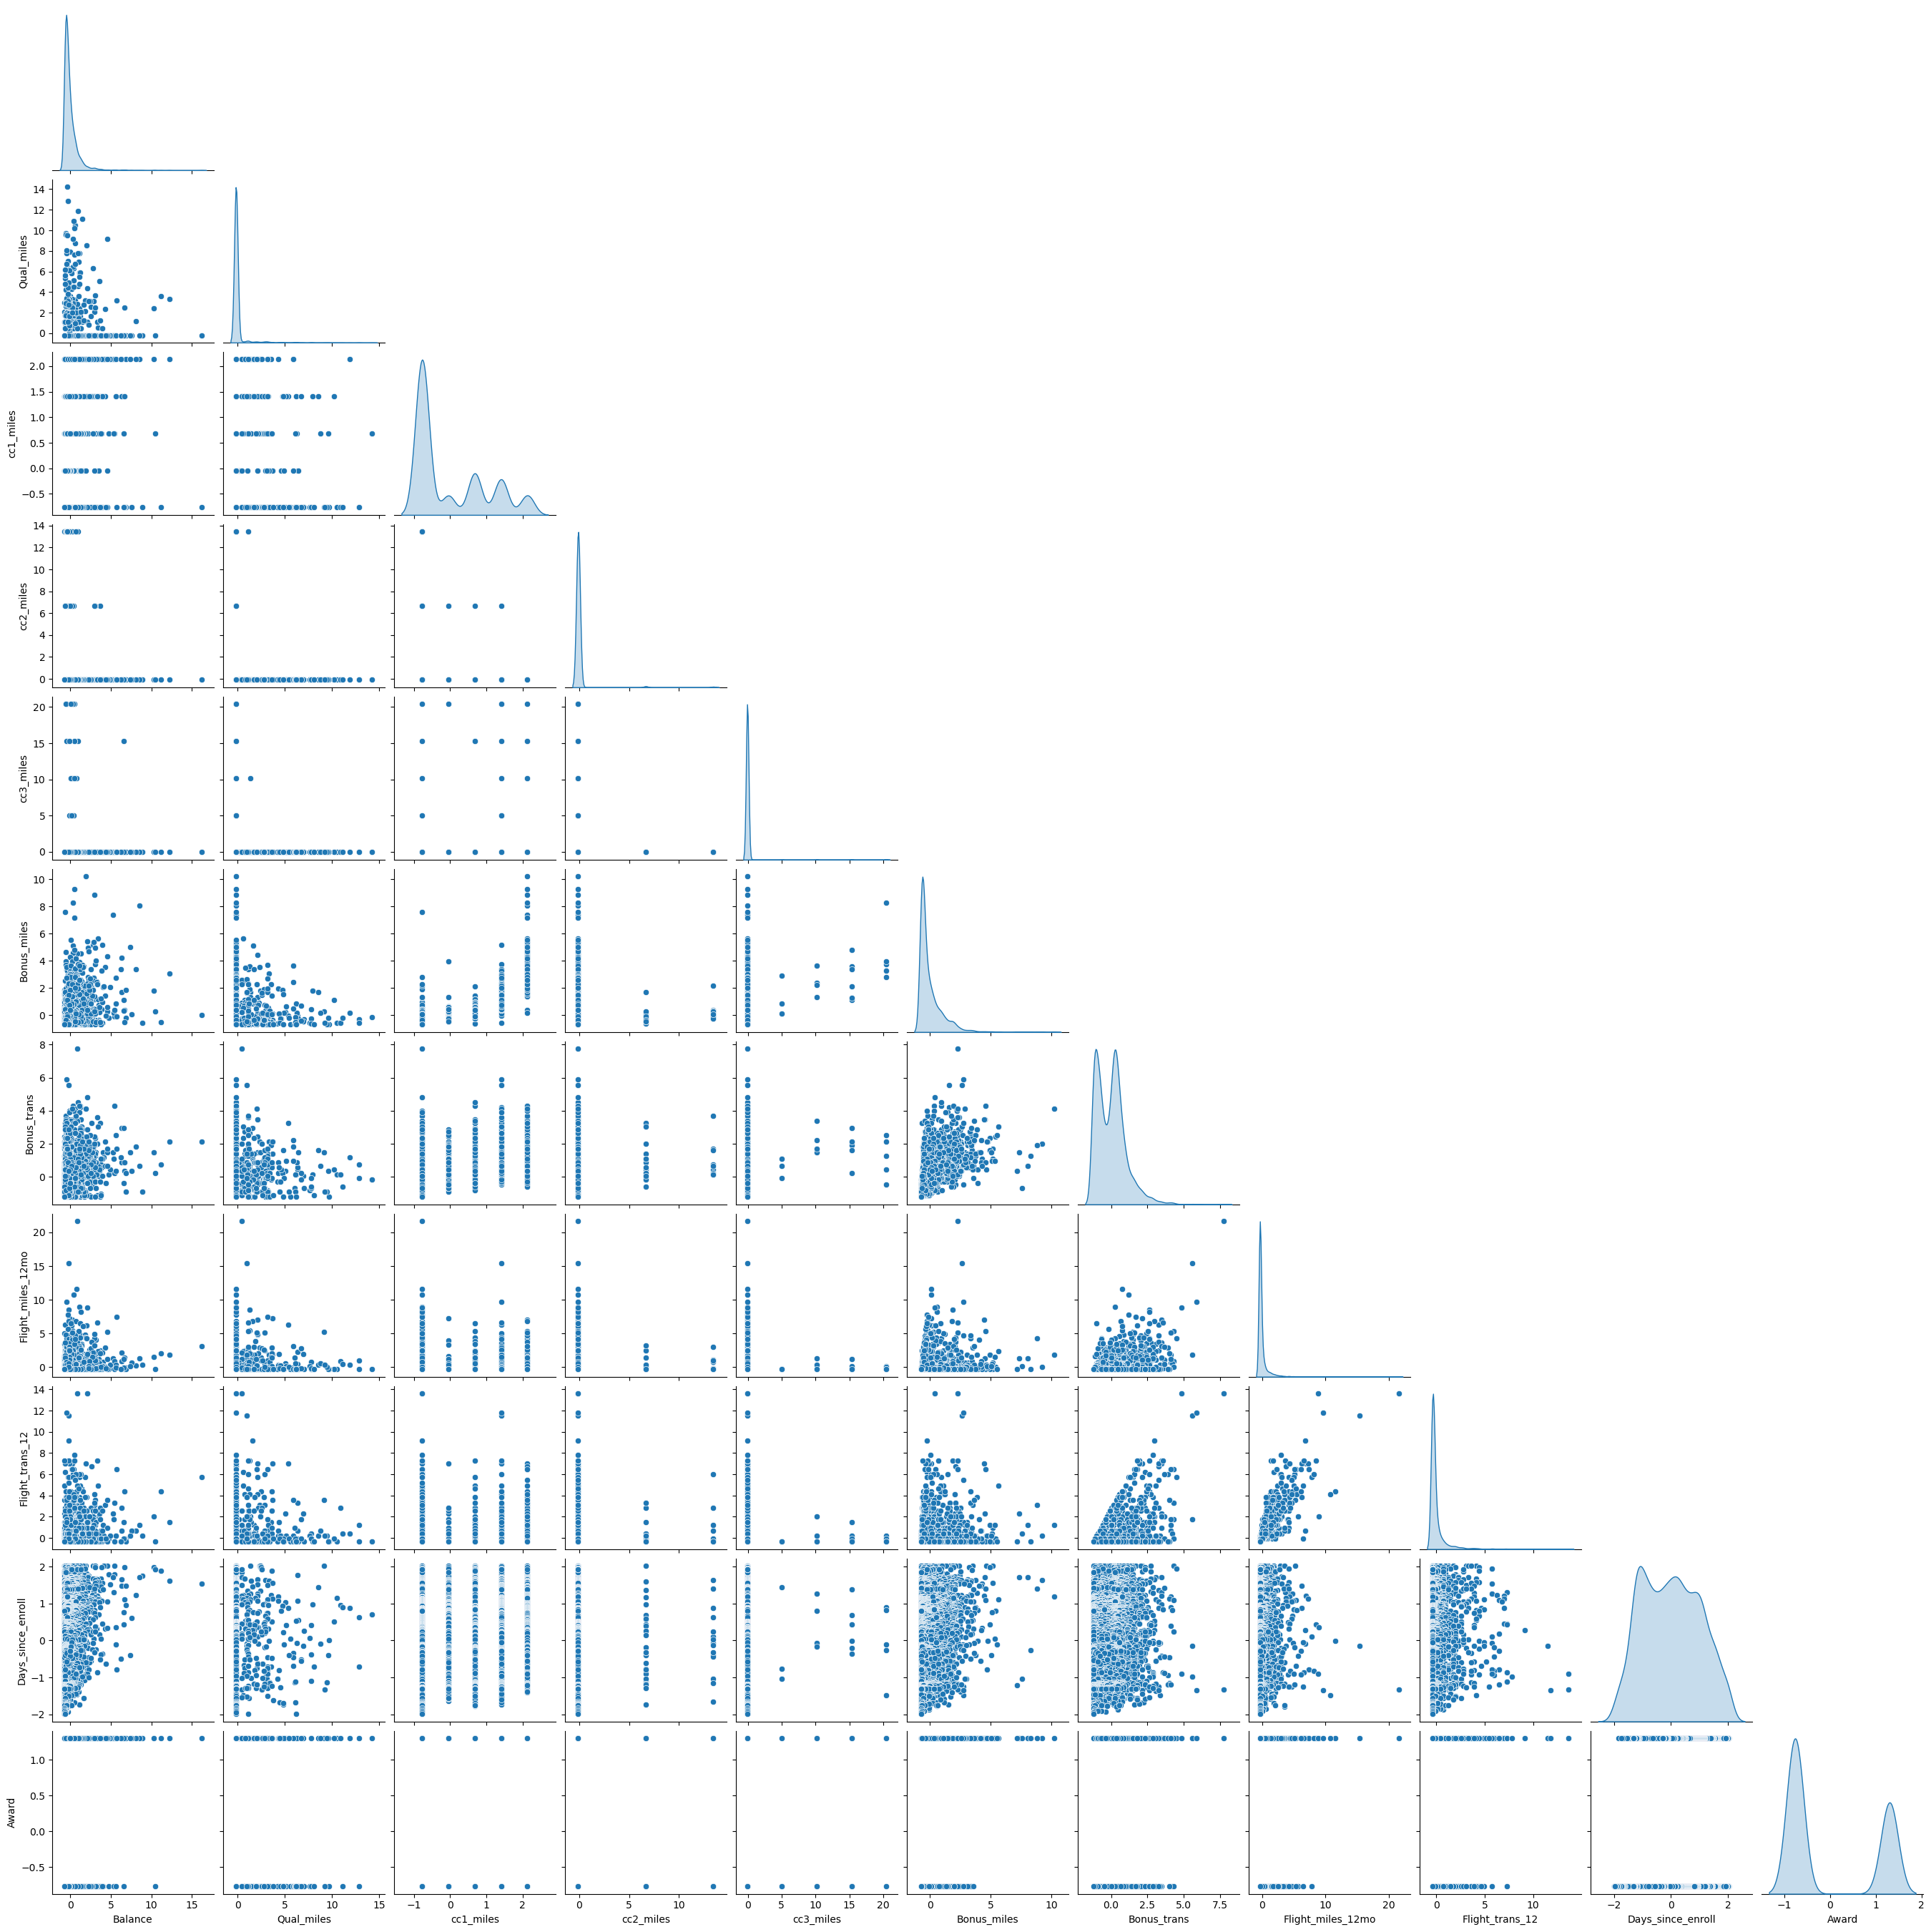

In [15]:
sns.pairplot(data = airlines3,corner=True,diag_kind='kde')
plt.show()

In [16]:
#Create dummies for 'cc_miles':
airlines4 = pd.get_dummies(airlines2, columns=['cc1_miles','cc2_miles','cc3_miles'], drop_first=True)
airlines4.head()


,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
0,28143,0,174,1,0,0,7000,0,0,0,0,0,0,0,0,0,0,0
1,19244,0,215,2,0,0,6968,0,0,0,0,0,0,0,0,0,0,0
2,41354,0,4123,4,0,0,7034,0,0,0,0,0,0,0,0,0,0,0
3,14776,0,500,1,0,0,6952,0,0,0,0,0,0,0,0,0,0,0
4,97752,0,43300,26,2077,4,6935,1,0,0,1,0,0,0,0,0,0,0


In [17]:
#Standardize the data using Standard Scaler:
scaler = StandardScaler()
airlines5 = scaler.fit_transform(airlines4)
airlines5 = pd.DataFrame(airlines5,columns=airlines4.columns)
airlines5.head(10)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,-0.27649,-0.425487,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-0.27649,-0.425487,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-0.27649,-0.425487,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-0.27649,-0.425487,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-0.27649,-0.425487,2.572381,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
5,-0.567483,-0.186299,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,-0.766919,-0.27649,-0.425487,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
6,0.112270,-0.186299,0.428076,1.395256,-0.328603,-0.362168,1.392549,-0.766919,-0.27649,2.350246,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
7,-0.523459,-0.186299,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,1.303918,-0.27649,-0.425487,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
8,3.666042,-0.186299,-0.637398,3.269747,2.421330,2.801807,1.370271,1.303918,-0.27649,2.350246,-0.388745,-0.278581,11.908880,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382
9,0.310220,-0.186299,0.467168,1.707671,0.492805,0.428826,1.362038,1.303918,-0.27649,2.350246,-0.388745,-0.278581,-0.083971,-0.06136,-0.0274,-0.031643,-0.038764,-0.035382


## Clustering : Hierarchical

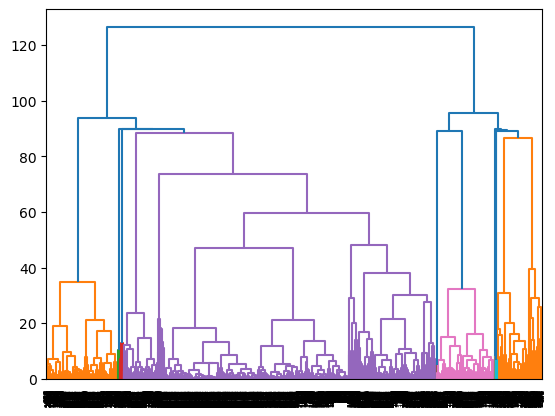

In [18]:
#Plotting dendogram using Ward linkage and Euclidean distance metric:
ward_eucli_link = linkage(airlines5,method = 'ward', metric = 'euclidean')
Dend_ward = dendrogram(ward_eucli_link)

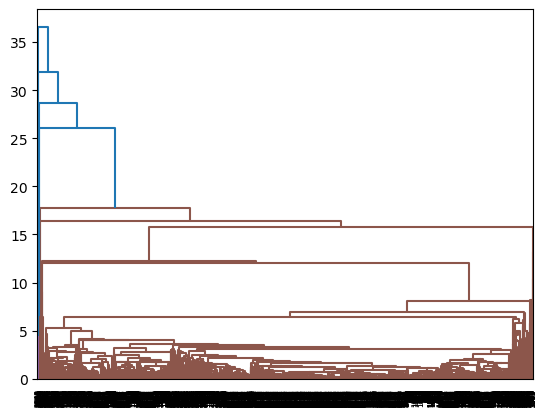

In [19]:
#Plotting dendogram using centroid linkage and Euclidean distance metric:
centroid_eucli_link = linkage(airlines5,method = 'centroid', metric = 'euclidean')
Dend_centroid = dendrogram(centroid_eucli_link)

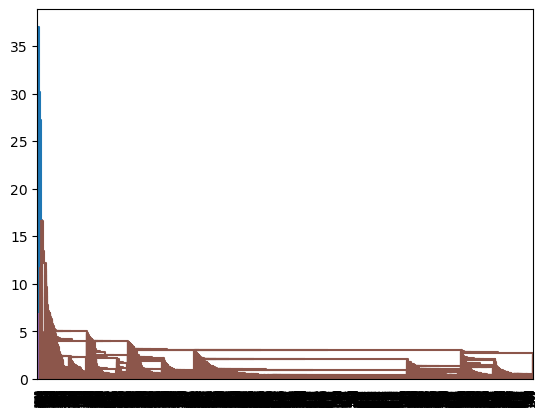

In [20]:
# Performing hierarchial clustering with Manhattan distance 
# and using the single linkage criterion:

single_city_link = linkage(airlines5,method = 'single', metric = 'cityblock')
Dend_single = dendrogram(single_city_link)

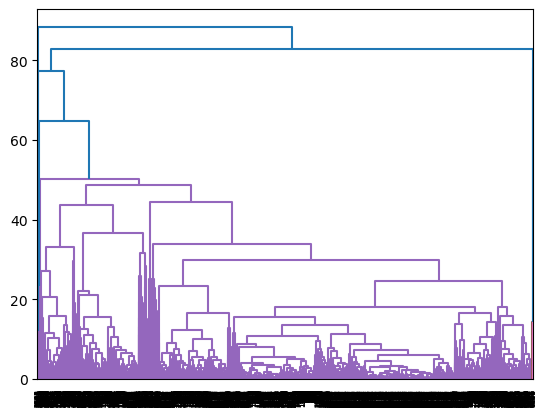

In [21]:
# Performing hierarchial clustering with Manhattan distance 
# and using the complete linkage criterion:

complete_city_link = linkage(airlines5,method = 'complete', metric = 'cityblock')
Dend_complete = dendrogram(complete_city_link)

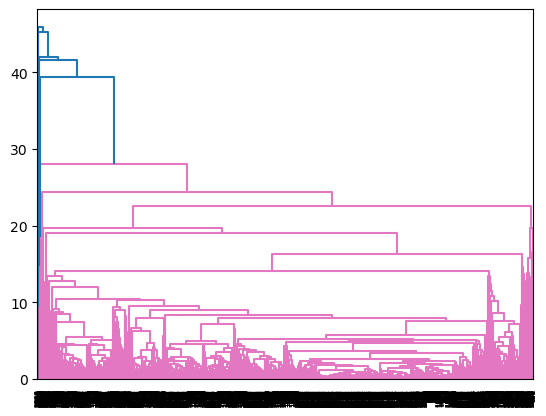

In [22]:
# Performing hierarchial clustering with Manhattan distance 
# and using the average linkage criterion:

avg_city_link = linkage(airlines5,method = 'average', metric = 'cityblock')
Dend_average = dendrogram(avg_city_link)

In [23]:
# Let's proceed and make clusters with dendogram made from ward method using maxclust:

In [24]:
clusters = fcluster(ward_eucli_link,4,criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [25]:
#Let's add cluster to original dataframe for profiling:
airlines6 = airlines2.copy()
airlines6['clusters'] = clusters
airlines6.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,16420,0,1,1,1,0,0,0,0,6942,0,2
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [26]:
# Now lets profile the clusters with mean:
Profiled = airlines6.groupby(airlines6['clusters']).mean()

In [27]:
Profiled['cluster_frequency'] = airlines6['clusters'].value_counts()

In [28]:
Profiled.reset_index(inplace = True)
Profiled

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_frequency
0,1,74286.217241,13.806897,3.000000,1.000000,1.000000,19596.779310,16.441379,254.613793,0.698276,4284.517241,0.451724,580
1,2,56007.372175,178.212783,1.159392,1.022603,1.000000,4968.338270,7.372564,311.860483,0.954404,3834.449727,0.256820,2566
2,3,99860.782979,52.812766,3.993617,1.000000,1.006383,39210.900000,18.293617,263.621277,0.738298,4755.808511,0.561702,470
3,4,158214.668407,225.039164,4.292428,1.000000,1.120104,67932.712794,24.396867,2005.093995,5.984334,4988.697128,0.772846,383


In [29]:
clusters = fcluster(ward_eucli_link,3,criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [30]:
#Let's add cluster to original dataframe for profiling:
airlines7 = airlines2.copy()
airlines7['clusters'] = clusters
airlines7.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
5,16420,0,1,1,1,0,0,0,0,6942,0,1
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [31]:
# Now lets profile the clusters with mean:
Profiled = airlines7.groupby(airlines7['clusters']).mean()

In [32]:
Profiled['cluster_frequency'] = airlines7['clusters'].value_counts()

In [33]:
Profiled.reset_index(inplace = True)
Profiled

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_frequency
0,1,59377.280038,147.902734,1.498729,1.018436,1.000000,7665.253655,9.044501,301.306421,0.907184,3917.424666,0.292753,3146
1,2,99860.782979,52.812766,3.993617,1.000000,1.006383,39210.900000,18.293617,263.621277,0.738298,4755.808511,0.561702,470
2,3,158214.668407,225.039164,4.292428,1.000000,1.120104,67932.712794,24.396867,2005.093995,5.984334,4988.697128,0.772846,383


## Clustering : KMeans

In [43]:
#Normalizing data:
airline_norm=pd.DataFrame(normalize(airlines4),columns=airlines4.columns)
airline_norm.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
0,0.970414,0.0,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.940209,0.0,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.981113,0.0,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.904428,0.0,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.912226,0.0,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,0.0,0.0,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
wss = []
SS = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=5)
    KM.fit(airline_norm)
    wss.append(KM.inertia_)
    SS.append(silhouette_score(airline_norm,KM.labels_))

In [49]:
wss

[267.59732631256907,
 173.27018003134637,
 116.3247382365712,
 90.82408058502816,
 70.47270327686064,
 60.072810711068605,
 51.93474400004561,
 47.18175699176729,
 43.10219362118724]

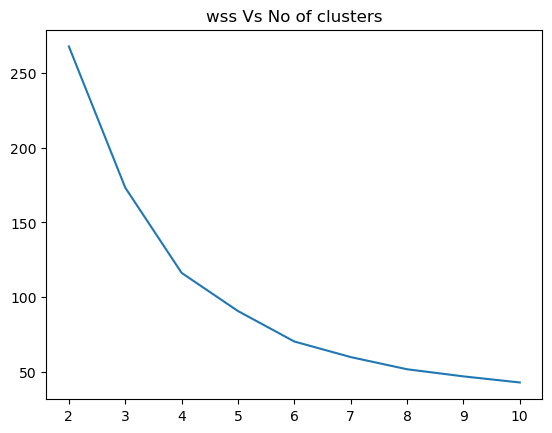

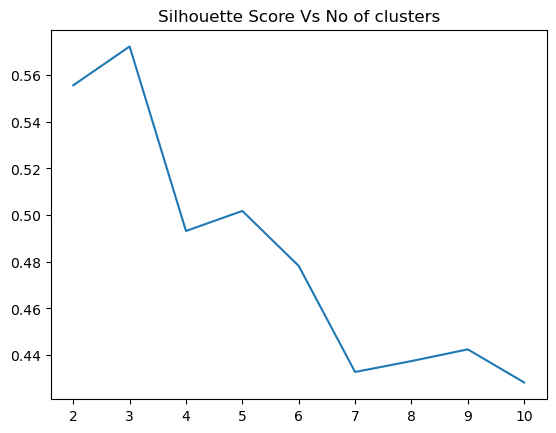

In [50]:
plt.plot(range(2,11),wss)
plt.title('wss Vs No of clusters')
plt.show()
plt.plot(range(2,11),SS)
plt.title('Silhouette Score Vs No of clusters')
plt.show()

In [51]:
#Let's do clustering with K=3 and K=5:

In [52]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(airline_norm)
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
silhouette_score(airline_norm,labels)
##We are getting value closer to 1 so we'll proceed with 3 clusters and do profiling:

0.5723566188525049

In [54]:
airlines8 = airlines2.copy()
airlines8['clusters'] = labels
airlines8.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0


In [55]:
Profiled = airlines8.groupby('clusters').mean()

In [57]:
Profiled['Cluster_Freq'] = airlines8['clusters'].value_counts()

In [60]:
Profiled.reset_index(inplace=True)
Profiled

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_Freq
0,0,86644.267347,164.398639,1.797619,1.011224,1.001701,12329.190136,10.579252,468.827551,1.394218,4046.339796,0.288095,2940
1,1,47062.690798,111.628221,3.319018,1.030675,1.053988,39388.652761,17.895706,546.411043,1.652761,4168.727607,0.722699,815
2,2,5087.991803,8.217213,1.008197,1.000000,1.000000,871.594262,2.901639,65.922131,0.192623,4821.176230,0.184426,244


In [61]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(airline_norm)
labels = kmeans.labels_
labels

array([1, 2, 1, ..., 0, 1, 2])

In [62]:
silhouette_score(airline_norm,labels)
##We are getting value closer to 1 so we'll proceed with 3 clusters and do profiling:

0.5016101508909964

In [64]:
airlines9 = airlines2.copy()
airlines9['clusters'] = labels
airlines9.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,2
6,84914,0,3,1,1,27482,25,0,0,6994,0,0
7,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [65]:
Profiled = airlines9.groupby('clusters').mean()

In [66]:
Profiled['Cluster_Freq'] = airlines9['clusters'].value_counts()

In [67]:
Profiled.reset_index(inplace=True)
Profiled

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_Freq
0,0,70729.472637,116.237811,3.136318,1.025871,1.019900,32570.934328,17.644776,445.794030,1.317413,4049.456716,0.491542,1005
1,1,97376.259795,185.326493,1.605877,1.009328,1.001866,9644.600280,9.707090,519.914179,1.563899,3959.281716,0.269590,2144
2,2,11768.858247,55.121134,1.005155,1.000000,1.000000,984.778351,3.469072,93.216495,0.293814,4908.760309,0.172680,388
3,3,27462.797721,116.148148,3.245014,1.034188,1.071225,41806.162393,17.572650,670.883191,1.945869,4224.609687,0.903134,351
4,4,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225,111


## DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [68]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [78]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(airlines5)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(airlines5, DBS_clustering.labels_))

In [79]:
DBSCAN_Scores = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
DBSCAN_Scores['No_of_clusters'] = no_of_clusters
DBSCAN_Scores['sil_score'] = sil_score
DBSCAN_Scores

,Eps,Min_samples,No_of_clusters,sil_score
0,0.25,3,74,-0.490876
1,0.25,4,44,-0.496245
2,0.25,5,25,-0.390021
3,0.25,6,18,-0.411560
4,0.25,7,14,-0.440376
...,...,...,...,...
215,2.75,18,7,0.393267
216,2.75,19,7,0.393267
217,2.75,20,7,0.393503
218,2.75,21,7,0.393613


In [80]:
pivot1 = pd.pivot_table(DBSCAN_Scores, values='No_of_clusters', index='Min_samples', columns='Eps')

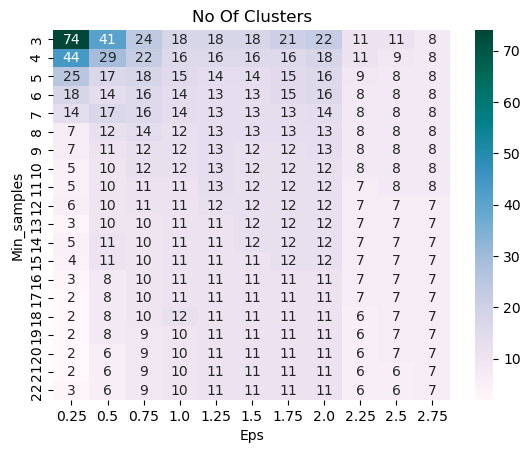

In [84]:
sns.heatmap(pivot1,cmap='PuBuGn',annot=True)
plt.title('No Of Clusters')
plt.show()

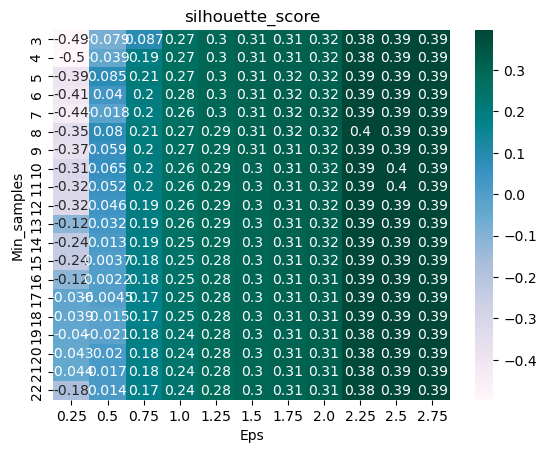

In [83]:
pivot2 = pd.pivot_table(DBSCAN_Scores, values='sil_score', index='Min_samples', columns='Eps')
sns.heatmap(pivot2,cmap='PuBuGn',annot=True)
plt.title('silhouette_score')
plt.show()

In [89]:
dbscan = DBSCAN(eps=2.25, min_samples=21)
airlines_dbs = dbscan.fit(airlines5)
airlines_dbs

DBSCAN(eps=2.25, min_samples=21)

In [91]:
airlines10 = airlines2.copy()
airlines10['DBSCAN_Labels'] = dbscan.labels_
airlines10.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_Labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [92]:
airlines10.groupby('DBSCAN_Labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,
-1,210939.882562,1400.711744,2.576512,1.206406,1.174377,43192.099644,24.430605,2959.900356,8.633452,4695.455516,0.679715
0,43118.706865,60.719852,1.000000,1.000000,1.000000,3220.826994,5.911874,290.005566,0.891002,3726.959647,0.225881
1,101719.238994,35.354298,4.000000,1.000000,1.000000,39102.607966,18.387841,306.010482,0.897275,4742.972746,0.570231
2,76618.107692,29.786325,3.000000,1.000000,1.000000,19638.266667,16.186325,213.533333,0.603419,4283.102564,0.456410
3,61458.174721,35.353160,2.000000,1.000000,1.000000,10634.962825,14.271375,141.420074,0.460967,4241.877323,0.356877
4,139479.441558,34.645022,5.000000,1.000000,1.000000,71342.086580,20.372294,319.709957,1.043290,5222.047619,0.727273
